### Implement a single neuron neural network, aka, the logistic regression unit. Use Log Loss Function, write code to carry out stochastic gradient descent for optimization, and then write a different activation function i.e., replace the sigmoid compression by ReLu or tan. Ideally, implement as a set of functions*. Run it on any classification problem using a dataset from the internet (say the titanic dataset). Provide accuracy and F1 score of the results. Please write code in Python in a Jupyter notebook.

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
data= pd.read_csv('C:\\Users\Manisha Bagora\\data\\Info7390\\heart.csv')

In [3]:
print(data.shape)

(303, 14)


In [4]:
data.head(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
y = data.output.values
x_data = data.drop(["output"],axis=1)

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Normalization of x_data Feature's

In [7]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [8]:
x.head()

age  sex        cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   1.0   

    oldpeak  slp  caa     thall  
0  0.370968  0.0  0.0  0.333333  
1  0.564516  0.0  0.0  0.666667  
2  0.225806  1.0  0.0  0.666667  
3  0.129032  1.0  0.0  0.666667  
4  0.096774  1.0  0.0  0.666667

## Now will split dataset into training and testing

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (13, 257)
x test:  (13, 46)
y train:  (257,)
y test:  (46,)


## Here Initialization Sigmoid Function and ReLU Function

In [10]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

## Sigmoid & Relu activation Function

In [11]:
def relu(a):
    
    return np.maximum(0,a)

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

In [12]:
## Forward and Backward Propagation

In [13]:
#Sigmoid

def forward_backward_propagation(w,b,x_train,y_head):

    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

#ReLu

def forward_backward_propagation(w,b,x_train,y_head):

    
    z = np.dot(w.T,x_train) + b
    y_head = relu(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients
  

### Updating (Learning) Parameters

In [14]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [15]:
#%% Prediction

def predict_sigmoid(w,b,x_test):

    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction



def predict_relu(w,b,x_test):

    # x_test is a input for forward propagation
    z = relu(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction



## Lets Calculate F1 Score

In [16]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if (y[i] == 1).any() and (y_hat[0] == 1).any():
            tp += 1
        elif (y[i] == 1).any() and (y_hat[0] == 0).any():
            fn += 1
        elif (y[i] == 0).any() and (y_hat[0] == 1).any():
            fp += 1
        elif (y[i] == 0).any() and (y_hat[0] == 0).any():
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

Cost after iteration 0: 1.638066
Cost after iteration 10: 0.973630
Cost after iteration 20: 0.810973
Cost after iteration 30: 0.741788
Cost after iteration 40: 0.705838
Cost after iteration 50: 0.683890
Cost after iteration 60: 0.668348
Cost after iteration 70: 0.655944
Cost after iteration 80: 0.645213
Cost after iteration 90: 0.635478


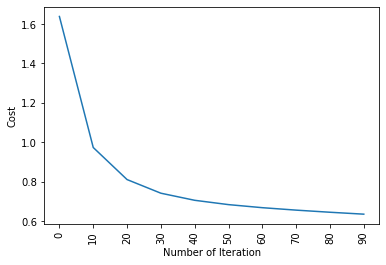

train accuracy: 69.26070038910505 %
test accuracy: 76.08695652173913 %
The F1 score :
0.7567567567567568


In [17]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict_relu(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict_relu(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    print("The F1 score :")
    print(f1_score(y_test,y_prediction_test))

    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 100) 
    

Code for L1 and L2 regularization

In [18]:
lam = 0.1

def  model_optimize_for_L1(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = relu(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) + (lam*(np.sum(w)))
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] + lam  # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [19]:
lam = 0.1

def  model_optimize_for_L2(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = relu(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) + (lam * (np.sum(np.square(w))))
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] + lam * w  
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients